In [13]:
import pandas as pd
import numpy as np
from gower import gower_matrix, gower_dist
from pyclustering.cluster.kmedoids import kmedoids
from sklearn.metrics import silhouette_score
import multiprocessing as mp

In [14]:
data = pd.read_csv('/home/avsngh/Mathematical Statistics/Masters-Projects/Unsupervised-Learning/Data/steam_tags_wide_no_omissing.csv')

In [15]:

# Select relevant columns for analysis
columns_to_exclude = ['name', 'id', 'description']
feature_columns = [col for col in data.columns if col not in columns_to_exclude]
features = data[feature_columns]

In [16]:
#transform the review_type into digits
features.loc[:, 'review_type'] = features['review_type'].astype('category').cat.codes

features.head()

,price,release_date,review_no,review_type,Mythology,Action RPG,Souls-like,RPG,Combat,Story Rich,...,ATV,Trivia,Word Game,Hex Grid,Mahjong,Feature Film,Rugby,Sokoban,Otome,360 Video
0,59.99,2024-08-20,574097,4,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0.00,2012-08-21,8286153,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.00,NaN,589527,7,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.48,2015-04-14,1703156,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.99,2019-12-05,565716,7,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Function to calculate Gower distance for a given row against all others
def compute_gower_distance_for_row(row_idx):
    distances = [gower_matrix(features.iloc[[row_idx]], features.iloc[[i]])[0][0] for i in range(len(features))]
    return distances

# Function to compute Gower distances using multiprocessing
def compute_gower_distance_matrix(features):
    with mp.Pool(mp.cpu_count()) as pool:
        gower_distance_matrix = pool.map(compute_gower_distance_for_row, range(len(features)))
    return np.array(gower_distance_matrix)

# Compute the Gower distance matrix
gower_distance_matrix = compute_gower_distance_matrix(features)


KeyboardInterrupt: 

In [6]:


# Calculate Gower distance matrix
#gower_distances = gower_matrix(features)

# Create a DataFrame for better readability
#gower_distances_df = pd.DataFrame(gower_distances, index=data['name'], columns=data['name'])
#gower_distances_df

KeyboardInterrupt: 

In [ ]:
np.fill_diagonal(gower_distances, 0)
distance_matrix = gower_distances.tolist()
distance_matrix


: 

In [40]:
distance_matrix = gower_distances.tolist()
np.fill_diagonal(, 0)
# Set initial medoids (you can choose them randomly)
cluster_numbers = [5, 10, 15, 20, 25, 30]
silhouette_scores = []
for n_clusters in cluster_numbers:
    # Set initial medoids (you can choose them randomly)
    initial_medoids = list(range(n_clusters))

    # Create and run K-Medoids using pyclustering
    kmedoids_instance = kmedoids(distance_matrix, initial_medoids, data_type='distance_matrix')
    kmedoids_instance.process()

    # Get clustering results and cluster labels
    clusters = kmedoids_instance.get_clusters()
    cluster_labels = [-1] * len(features)
    for cluster_id, cluster in enumerate(clusters):
        for index in cluster:
            cluster_labels[index] = cluster_id

    # Calculate silhouette score
    silhouette_avg = silhouette_score(gower_distances, cluster_labels, metric="precomputed")
    silhouette_scores.append((n_clusters, silhouette_avg))

for n_clusters, score in silhouette_scores:
    print(f"Number of clusters: {n_clusters}, Silhouette Score: {score}")

ValueError: The precomputed distance matrix contains non-zero elements on the diagonal. Use np.fill_diagonal(X, 0).

In [37]:
data['cluster'].value_counts()

cluster
7    1583
6    1052
8     929
9     844
5     784
3     637
2     563
0     383
4     379
1     279
Name: count, dtype: int64

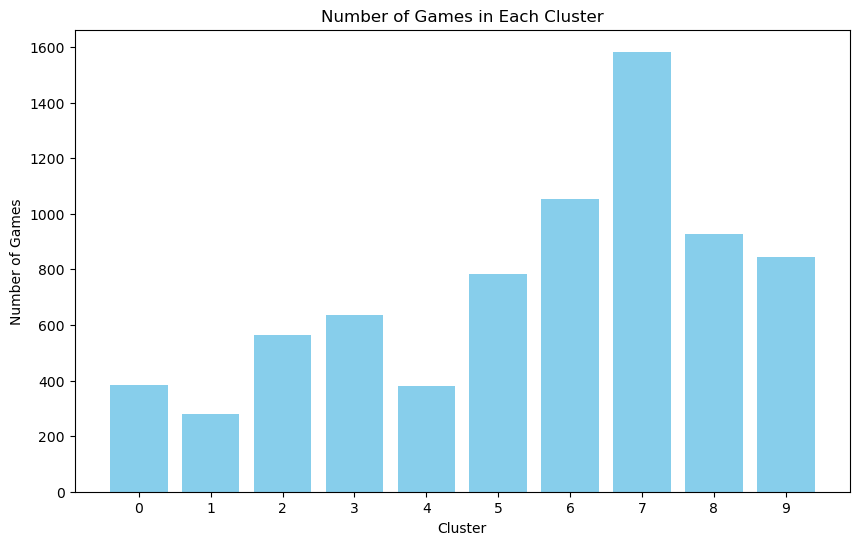

In [38]:
import matplotlib.pyplot as plt

# Count the number of games in each cluster
cluster_counts = data['cluster'].value_counts()

# Plot the cluster counts
plt.figure(figsize=(10, 6))
plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Games')
plt.title('Number of Games in Each Cluster')
plt.xticks(cluster_counts.index)
plt.show()